In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
signal = np.ones(1000) * 0.5
signal[400:600] = 1

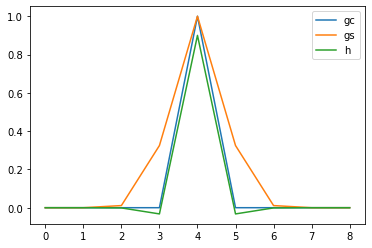

In [3]:
xvalues = np.linspace(-3, 3, 9)
gc = np.exp(-(xvalues**2) / (2 * 0.1**2))
gs = np.exp(-(xvalues**2) / (2 * 0.5**2))

H_ON = gc - 0.1 * gs
plt.plot(gc)
plt.plot(gs)
plt.plot(H_ON)
plt.legend(['gc', 'gs', 'h'])

In [4]:
smoothed = np.convolve(signal, gs, 'same')
smoothed /= smoothed.max()

In [5]:
sharpened = np.convolve(H_ON, smoothed, 'same')
sharpened[sharpened < 0] = 0
sharpened /= sharpened.max()

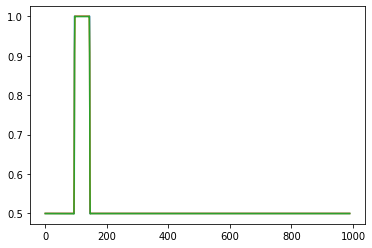

In [6]:
plt.plot(signal[5:-5])
plt.plot(smoothed[5:-5])
plt.plot(sharpened[5:-5])

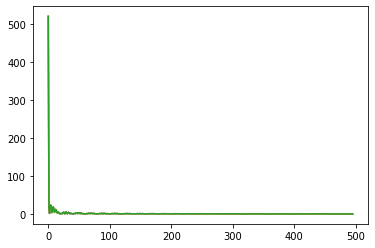

In [7]:
y1 = np.abs(np.fft.rfft(signal[5:-5]).real)
y2 = np.abs(np.fft.rfft(smoothed[5:-5]).real)
y3 = np.abs(np.fft.rfft(sharpened[5:-5]).real)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)

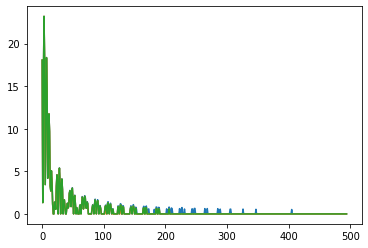

In [8]:
y1[y1 < y1.max() / 1000] = 0
y2[y2 < y2.max() / 1000] = 0
y3[y3 < y3.max() / 1000] = 0
plt.plot(y1[1:])
plt.plot(y2[1:])
plt.plot(y3[1:])

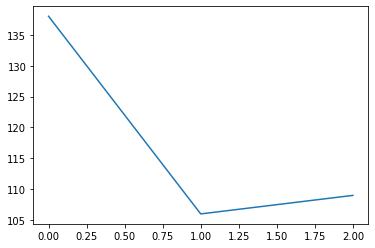

In [9]:
count = list(map(np.sum, [y1>0, y2>0, y3>0]))
plt.plot(count)